## ETH Price Prediction With Linear Regression


In [1]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# Set the date range and prediction parameters
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2025-01-01")
predict_days = 30  # Modify this number for different prediction periods


In [3]:
eth = yf.download('ETH-USD', start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Cross-validation MSE: 1078055.07
R-squared: 0.2065


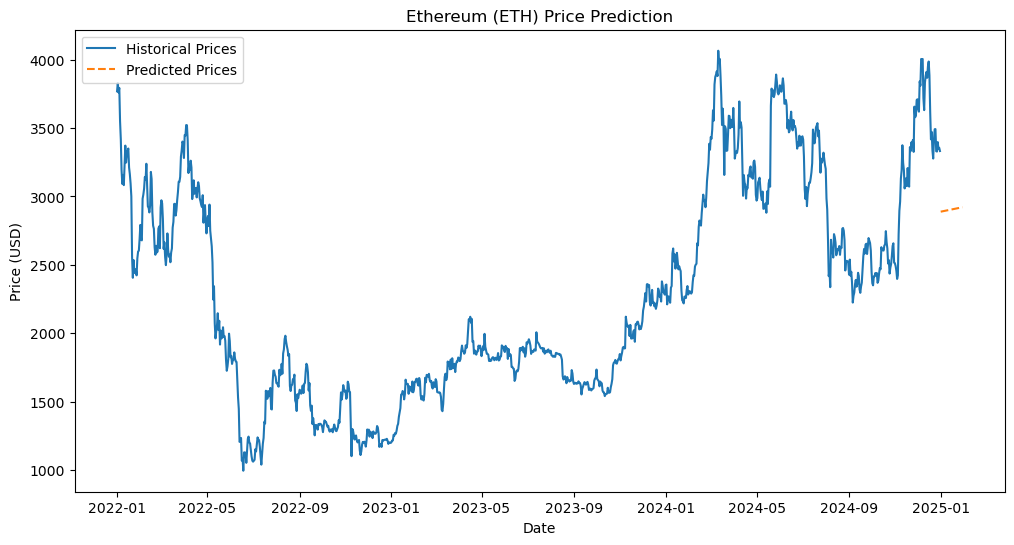

🗃 Historical Data


Price,Close
Ticker,ETH-USD
Date,
2022-01-01,3769.697021
2022-01-02,3829.564941
2022-01-03,3761.380371
2022-01-04,3794.056641
2022-01-05,3550.386963
...,...
2024-12-27,3328.916992
2024-12-28,3397.902344


🔮 Predicted Future Prices


,Date,Predicted Close Price (USD)
0,2025-01-01,2888.926197
1,2025-01-02,2890.042694
2,2025-01-03,2891.159191
3,2025-01-04,2892.275688
4,2025-01-05,2893.392185
5,2025-01-06,2894.508682
6,2025-01-07,2895.625179
7,2025-01-08,2896.741676
8,2025-01-09,2897.858173
9,2025-01-10,2898.974670


In [4]:
if eth.empty:
    print("No data found. Please adjust the date range.")
else:
    # Prepare data
    eth['Date'] = eth.index
    eth['Days'] = (eth['Date'] - eth['Date'].min()).dt.days
    X = eth['Days'].values.reshape(-1, 1)
    y = eth['Close'].values

    # Train model
    model = LinearRegression()
    model.fit(X, y)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = np.mean(cv_scores)
    print(f"Cross-validation MSE: {-mean_cv_score:.2f}")

    # R-squared error
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"R-squared: {r2:.4f}")

    # Predict future
    last_day = X[-1][0]
    future_days = np.array(range(last_day + 1, last_day + predict_days + 1)).reshape(-1, 1)
    future_prices = model.predict(future_days)

    # Prepare future dates
    future_dates = pd.date_range(eth['Date'].iloc[-1] + pd.Timedelta(days=1), periods=predict_days)

    # Ensure future_prices and future_dates are 1D arrays
    future_prices = future_prices.flatten()  # Reshape to 1D
    future_dates = future_dates.to_list()  # Convert to list to ensure 1D

    # Plot the prediction graph
    plt.figure(figsize=(12, 6))
    plt.plot(eth['Date'], y, label='Historical Prices')
    plt.plot(future_dates, future_prices, label='Predicted Prices', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Ethereum (ETH) Price Prediction')
    plt.legend()
    plt.show()

    # Data overview
    print("🗃 Historical Data")
    display(eth[['Close']])

    print("🔮 Predicted Future Prices")
    prediction_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted Close Price (USD)': future_prices
    })
    display(prediction_df)